In [1]:
import pandas as pd
from geopy import distance as distance
from geopy import Point as Point
from scipy.spatial.distance import cdist
import numpy as np
import scipy as stats
import datetime


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
taxi_trip=pd.read_csv('/content/nyc_taxi_trip_duration.csv')

In [4]:
taxi_trip.tail(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
305457,id0459063,1,2016-04-10 13:49:21,2016-04-10 14:02:27,2,-73.999794,40.726700,-73.980827,40.755112,N,786.0
305458,id3681568,2,2016-05-09 18:08:33,2016-05-09 18:25:16,1,-73.981888,40.740730,-73.983459,40.761604,N,1003.0
305459,id1732377,1,2016-03-01 10:49:39,2016-03-01 11:08:45,1,-74.002838,40.760433,-73.988464,40.751171,N,1146.0
305460,id3682595,1,2016-06-17 13:25:38,2016-06-17 13:34:06,1,-73.965630,40.754589,-73.967842,40.765324,N,508.0
305461,id0482744,1,2016-01-13 15:58:43,2016-01-13 16:04:54,1,-73.976967,40.739170,-73.974228,40.746593,N,371.0
305462,id1771802,1,2016-06-27 15:19:58,2016-06-27 15:29:29,1,-73.974655,40.791046,-73.981873,40.771053,N,571.0
305463,id2550060,1,2016-01-29 21:12:27,2016-01-29 21:34:51,3,-73.988838,40.725906,-74.003372,40.742622,N,1344.0
305464,id0331098,1,2016-04-21 23:45:22,2016-04-21 23:48:17,1,-73.958511,40.815697,-73.965263,40.806210,N,175.0
305465,id0840170,1,2016-06-30 18:03:11,2016-06-30 18:08:19,1,-73.959671,40.762730,-73.949600,40.775131,N,308.0
305466,id0913432,2,2016-06-25 00:06:00,2016-06-25 00:32:15,2,-73.872940,40.774151,-73.976158,40.670000,NaN,NaN


In [5]:
taxi_trip['pickup_datetime']=pd.to_datetime(taxi_trip['pickup_datetime'])

In [6]:
taxi_trip['time']=taxi_trip['pickup_datetime'].dt.time

In [7]:
#taxi_trip.pickup_day=pd.to_datetime(taxi_trip.pickup_day)
taxi_trip['pickup_day']=taxi_trip['pickup_datetime'].apply(lambda x : x.day_name())
#taxi_trip['pickup_day']=taxi_trip['pickup_day'].dt.strftime('%a')

In [8]:
taxi_trip['pickup_month']=taxi_trip['pickup_datetime'].apply(lambda x:x.month_name())
#taxi_trip.pickup_month=pd.to_datetime(taxi_trip.pickup_month)

In [9]:
taxi_trip=taxi_trip.drop('time',axis=1)


In [10]:
taxi_trip.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400.0,Monday,February
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100.0,Friday,March
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635.0,Sunday,February
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141.0,Tuesday,January
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848.0,Wednesday,February


In [11]:
taxi_trip['date_pickup']=taxi_trip['pickup_datetime'].dt.date

In [12]:
taxi_trip['date_pickup']=pd.to_datetime(taxi_trip['date_pickup'])


In [13]:
taxi_trip['month_pickup']=taxi_trip['date_pickup'].dt.month

In [14]:
taxi_trip['time']=taxi_trip['pickup_datetime'].dt.time

In [15]:
taxi_trip['hours']=taxi_trip['pickup_datetime'].dt.hour



In [17]:
taxi_trip.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,date_pickup,month_pickup,time,hours
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400.0,Monday,February,2016-02-29,2,16:40:21,16
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100.0,Friday,March,2016-03-11,3,23:35:37,23
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635.0,Sunday,February,2016-02-21,2,17:59:33,17
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141.0,Tuesday,January,2016-01-05,1,09:44:31,9
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848.0,Wednesday,February,2016-02-17,2,06:42:23,6


In [18]:
rows,columns= taxi_trip.shape
rows,columns

(305467, 17)

Data cleaning before handling EDA

In [19]:
taxi_trip.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    1
trip_duration         1
pickup_day            0
pickup_month          0
date_pickup           0
month_pickup          0
time                  0
hours                 0
dtype: int64

In [20]:
taxi_trip.dropna(axis=0,how='any',inplace=True)

In [21]:
taxi_trip.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_day            0
pickup_month          0
date_pickup           0
month_pickup          0
time                  0
hours                 0
dtype: int64

In [22]:
rows,columns=taxi_trip.shape
rows,columns

(305466, 17)

In [23]:
#Since these are locations and cannot be replaced we might have to drop the nulls , but for
# for the sake of data intergrity we have to ensure that the average remains the same after
#removing data.

taxi_trip.mean()

<ipython-input-23-267b029d57bd>:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  taxi_trip.mean()
<ipython-input-23-267b029d57bd>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  taxi_trip.mean()


vendor_id              1.536816
passenger_count        1.666591
pickup_longitude     -73.973380
pickup_latitude       40.751009
dropoff_longitude    -73.973386
dropoff_latitude      40.751783
trip_duration        952.257384
month_pickup           3.519773
hours                 13.617250
dtype: float64

A Program that enables a user to calculate their distance........

In [24]:



def calculate_distance() :

      pickup_lat=float(input('Please enter your pickup latitude '))
      pickup_long=float(input('Please enter your pickup longitude '))
      pickup_time=(pickup_lat,pickup_long)
      dropoff_lat=float(input('Please enter your dropoff latitude '))
      dropoff_long=float(input('Please enter your dropoff longitude '))
      drop_time=(dropoff_lat,dropoff_long)



      print('Your distance in kilometers from your pickup location to your dropoff location is  ',distance.distance(pickup_time,drop_time).kilometers ,'km' )


Calculating Distance

In [25]:
dis=pd.DataFrame(taxi_trip['pickup_latitude'])

In [26]:
dis=dis.join(taxi_trip['pickup_longitude'])

In [27]:
dis=dis.join(taxi_trip['dropoff_latitude'])

In [28]:
dis=dis.join(taxi_trip['dropoff_longitude'])

A merging of these attributes will assist us in finding the distance between our pickup location  and dropoff location.

In [29]:
dis


,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,40.778873,-73.953918,40.771164,-73.963875
1,40.731743,-73.988312,40.694931,-73.994751
2,40.721458,-73.997314,40.774918,-73.948029
3,40.759720,-73.961670,40.780628,-73.956779
4,40.708469,-74.017120,40.740631,-73.988182
...,...,...,...,...
305461,40.739170,-73.976967,40.746593,-73.974228
305462,40.791046,-73.974655,40.771053,-73.981873
305463,40.725906,-73.988838,40.742622,-74.003372
305464,40.815697,-73.958511,40.806210,-73.965263


In [30]:
#Use Eucledian Geometry for Distance (sqrt(x2-x1)+(y2-y1))
import math
#rad=math.pi


dis['pickup_latitude']=((dis['pickup_latitude'])/180)*math.pi
dis['pickup_longitude']=((dis['pickup_longitude'])/180)*math.pi
dis['dropoff_latitude']=((dis['dropoff_latitude'])/180)*math.pi
dis['dropoff_longitude']=((dis['dropoff_longitude'])/180)*math.pi




In [31]:
dis['pickup_latitude'].head(2)


0    0.711726
1    0.710903
Name: pickup_latitude, dtype: float64

In [32]:
dis['pickup_latitude']

0         0.711726
1         0.710903
2         0.710724
3         0.711391
4         0.710497
            ...   
305461    0.711033
305462    0.711938
305463    0.710801
305464    0.712368
305465    0.711444
Name: pickup_latitude, Length: 305466, dtype: float64

In [33]:
dis['pickup_latitude']

0         0.711726
1         0.710903
2         0.710724
3         0.711391
4         0.710497
            ...   
305461    0.711033
305462    0.711938
305463    0.710801
305464    0.712368
305465    0.711444
Name: pickup_latitude, Length: 305466, dtype: float64

In [40]:
dis['latitude**2']=(dis['dropoff_latitude']-dis['pickup_latitude'])**2
dis['latitude**2']

0         1.810537e-08
1         4.127903e-07
2         8.705608e-07
3         1.331663e-07
4         3.150889e-07
              ...     
305461    1.678652e-08
305462    1.217596e-07
305463    8.511765e-08
305464    2.741741e-08
305465    4.684992e-08
Name: latitude**2, Length: 305466, dtype: float64

In [41]:
dis['longitude**2']=(dis['dropoff_longitude']-dis['pickup_longitude'])**2

In [42]:
import math as math

dis['distance_added']=dis['latitude**2']+dis['longitude**2']

In [43]:
distance_in_rads=np.sqrt(dis['distance_added'])

#dis_tance

In [44]:
distance_in_rads=pd.DataFrame(distance_in_rads)

In [ ]:
distance_in_rads=distance_in_rads*6371.0

# Converting into radians

Since we have the distance in rads we need to change it into km::

distance_in_rads

Since we have the distance in rads we need to change it into km::

We change it by finding its product with the earths radius

In [45]:
distance_in_rads

,distance_added
0,0.000220
1,0.000652
2,0.001269
3,0.000375
4,0.000755
...,...
305461,0.000138
305462,0.000371
305463,0.000387
305464,0.000203


In [46]:
distance_in_rads['time_now']=pd.to_timedelta(taxi_trip['trip_duration'],unit='s')


In [47]:
distance_in_rads

,distance_added,time_now
0,0.000220,0 days 00:06:40
1,0.000652,0 days 00:18:20
2,0.001269,0 days 00:27:15
3,0.000375,0 days 00:19:01
4,0.000755,0 days 00:14:08
...,...,...
305461,0.000138,0 days 00:06:11
305462,0.000371,0 days 00:09:31
305463,0.000387,0 days 00:22:24
305464,0.000203,0 days 00:02:55


In [48]:
hi=pd.DataFrame(taxi_trip['store_and_fwd_flag'].value_counts())

The graph below shows that there is a linear relationship between the distance travelled as well as time , we need to continue with our analysis to check on the stregnth of the relationship. Our graph also shows us that there are some data points that are moving in a certain directin which shows linear relationship between the two variables

<Axes: title={'center': 'The relationship between the distance travelled and time in seconds'}, xlabel='distance_added', ylabel='trip_duration'>

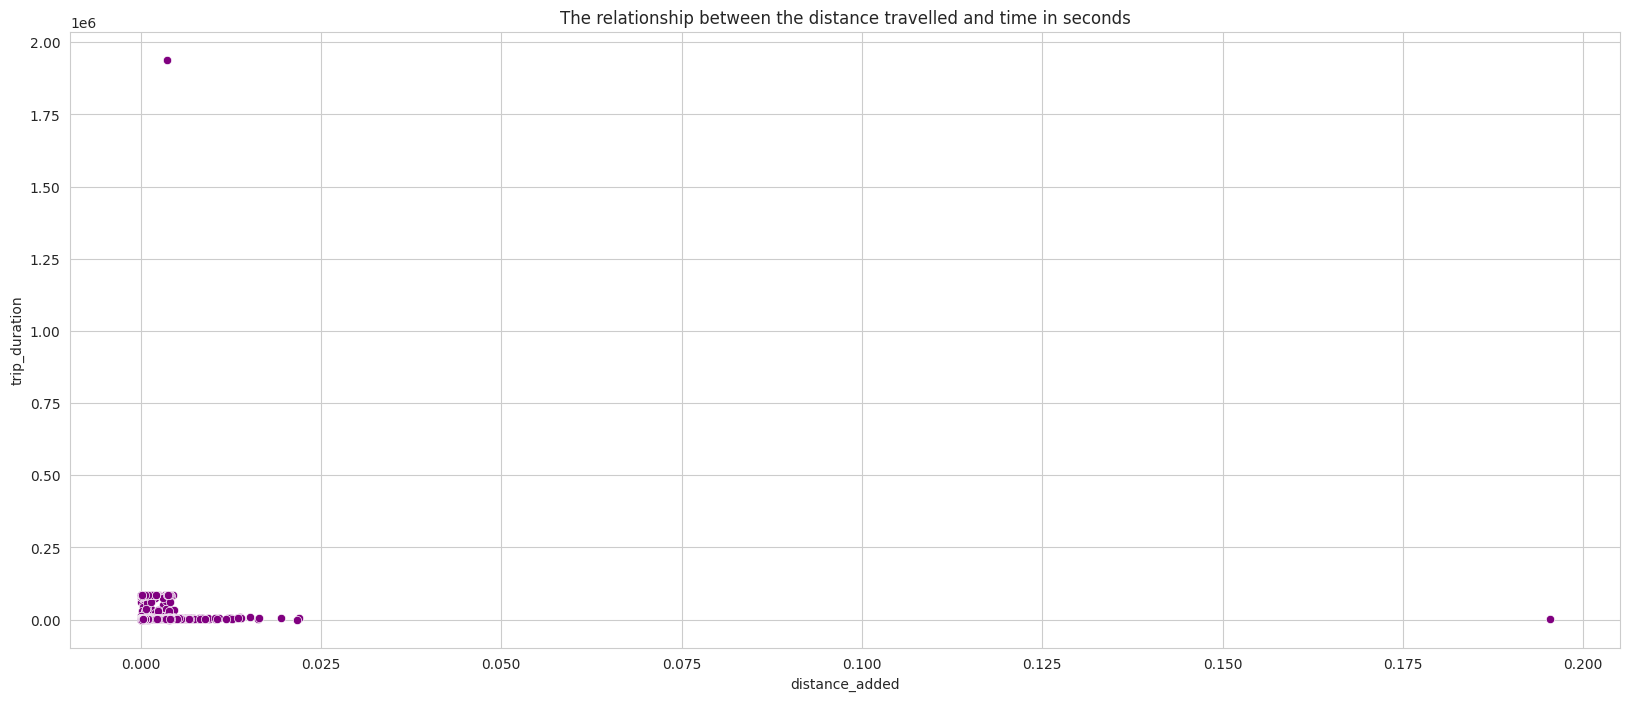

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
#axes = plt.axes(projection='3d')
plt.figure(figsize=(20,8))
plt.title('The relationship between the distance travelled and time in seconds')
sns.scatterplot(x=distance_in_rads['distance_added'],y=taxi_trip['trip_duration'],color='purple')


The Graph also shows us that the distance attribute is positively skewed as we can see from our kde plot

<Axes: xlabel='distance_added', ylabel='Density'>

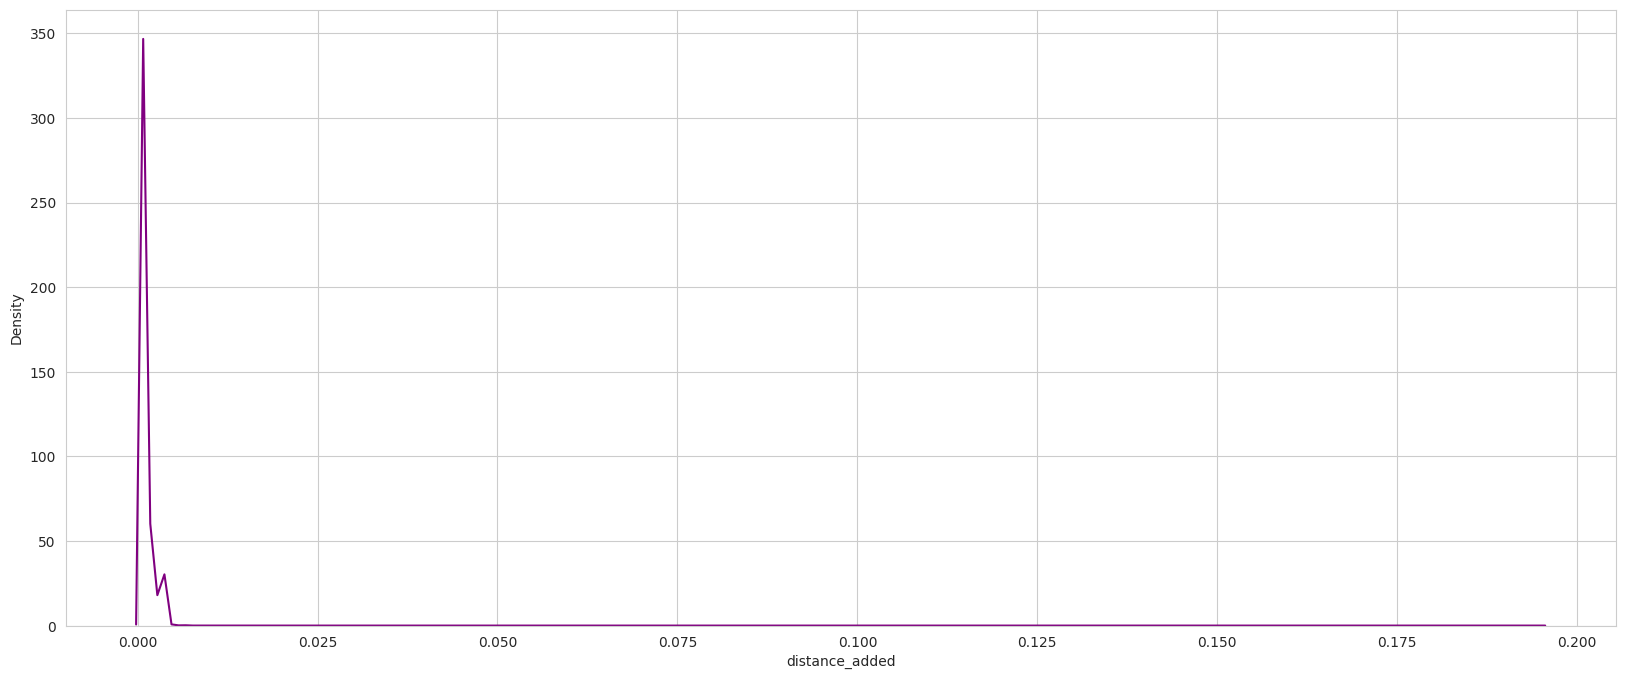

In [50]:
plt.figure(figsize=(20,8))
sns.kdeplot(distance_in_rads['distance_added'],color='purple')



We will use correlation to check the stregnth of the relationship between the two variables  which is distance and time

In [51]:
correlation = taxi_trip['trip_duration'].corr(distance_in_rads['distance_added'])

print("The correlation coefficient is  : " , correlation )

The correlation coefficient is  :  0.1070876812120274


In conclusion for distance and time have a weak positive relationship

Box and whisker for distance

Our box and whisker shows that we have an amount of 4-10 passengers that are far from our average pasengers

Text(0.5, 0, 'Box and Whisker for distance travelled')

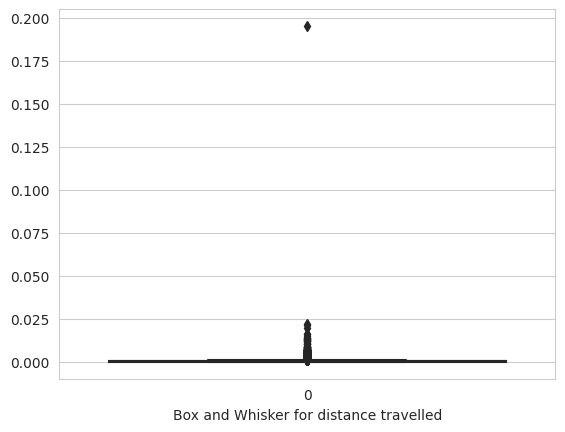

In [52]:
sns.set_palette("cubehelix")
sns.boxplot(distance_in_rads['distance_added'],orient='verticle',color='purple')
plt.xlabel('Box and Whisker for distance travelled')

My Hypothesis:


1.   Duration may take a bit longer during  
     weekends

2.   The distance affects the duration of the
     trip
3.  Trip duration is affected by time     






Bivariate analysis

Text(0.5, 1.0, 'Vendors vs Trip Duration')

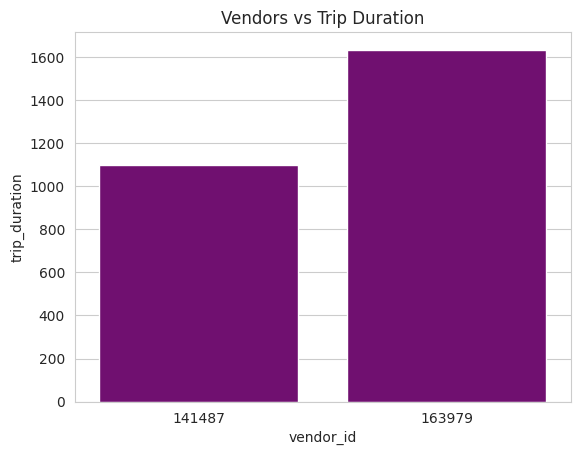

In [53]:
sns.set_palette("cubehelix")
sns.barplot(x=taxi_trip['vendor_id'].value_counts(),y=taxi_trip['trip_duration'],color='purple')
plt.title('Vendors vs Trip Duration')


There is a large number of flags that are submitted to the server which
results in a lesser amount of distance covered per vendor due to the lack of communication between the customer and the vendor  .

(This represents an indirect relationship between the two)


When there is a small amount of store and forward flags submitted to a server it results in a smaller of distance covered by the vendor.

(This represents a direct relationship between the two )




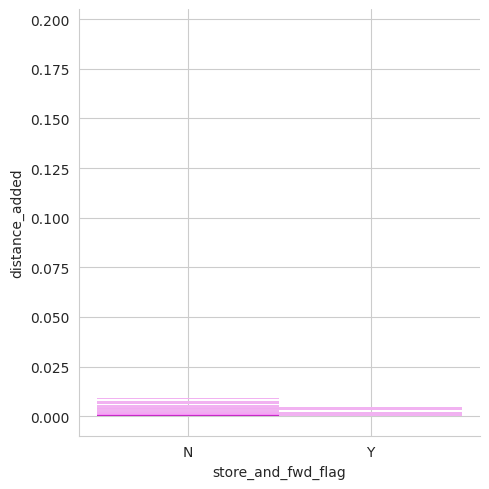

In [55]:
#custom_palette = ["#3498db", "#e74c3c", "#2ecc71", "#f1c40f", "#9b59b6"]



sns.set_palette('cubehelix')


sns.displot(x=taxi_trip['store_and_fwd_flag'],y=distance_in_rads['distance_added'],color='purple')
#plt.show()

According to our graph we can see that Sunday is the most travelled day according to our bar graph

<Axes: xlabel='pickup_day', ylabel='distance_added'>

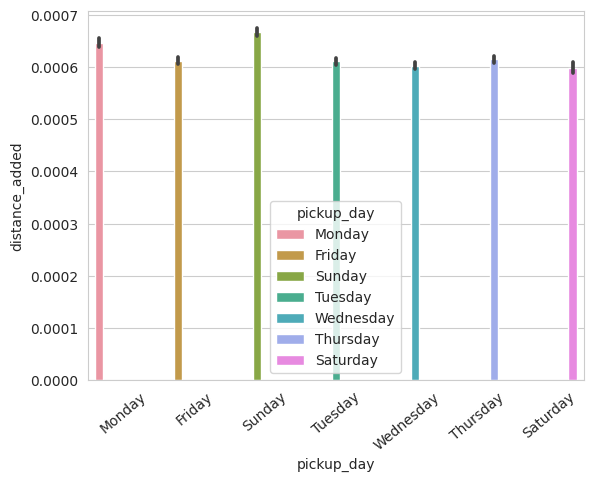

In [56]:
sns.set_palette("cubehelix")
plt.xticks(rotation=40)



sns.barplot(x=taxi_trip['pickup_day'],y=distance_in_rads['distance_added'],hue=taxi_trip['pickup_day'])



According to the graph month that most people travelled in is May and people travel less during the month of June

Text(0.5, 1.0, 'A bar graph for trip taken per month')

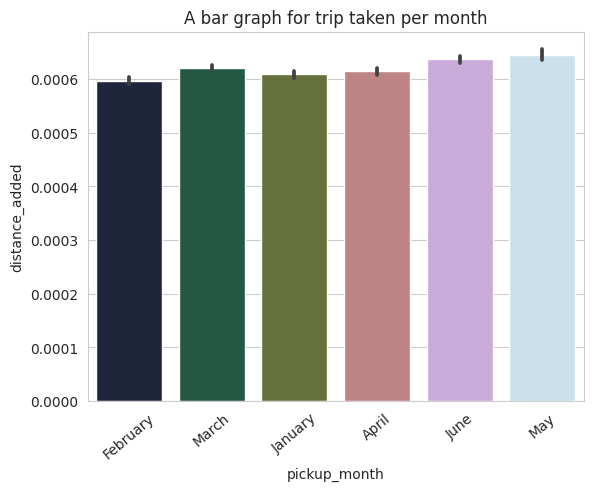

In [57]:
#trip per month
sns.set_palette('cubehelix')
plt.xticks(rotation=40)
sns.barplot(x=taxi_trip['pickup_month'],y=distance_in_rads['distance_added'])
plt.title('A bar graph for trip taken per month')

Analysis:



Text(0.5, 1.0, 'A Graph showing trip duration per vendor ID')

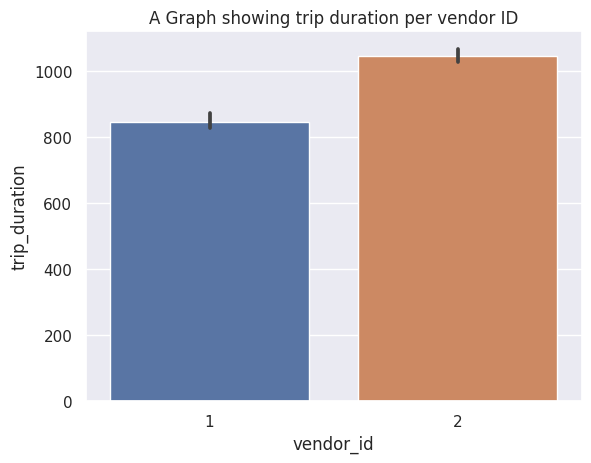

In [58]:
#Duration per month
sns.set_palette('cubehelix')
sns.set_context('paper')
sns.set_theme('notebook')

sns.barplot(y=taxi_trip['trip_duration'],x=taxi_trip['vendor_id'])
plt.title('A Graph showing trip duration per vendor ID')

Analysis ⤵
The longest distance was covered during a passenger count of 6   


<Axes: title={'center': 'Distance covered per passenger'}, xlabel='passenger_count', ylabel='distance_added'>

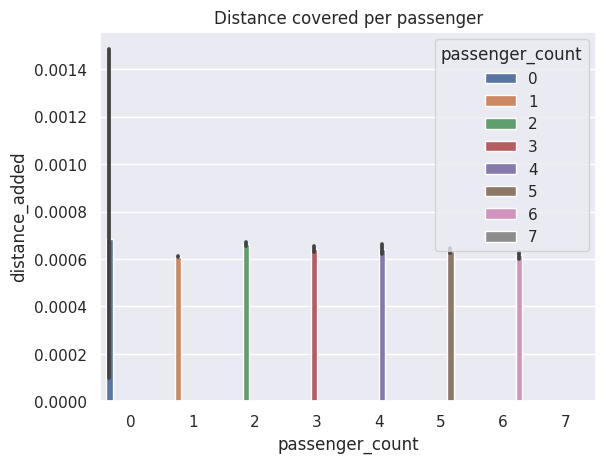

In [59]:
sns.set_palette('rainbow')
plt.title('Distance covered per passenger')
sns.set_context('paper')

sns.set_theme('notebook')
sns.barplot(x=taxi_trip['passenger_count'],y=distance_in_rads['distance_added'],hue=taxi_trip['passenger_count'])

<Axes: title={'center': 'A graph for Duration vs distance '}, xlabel='distance_added', ylabel='trip_duration'>

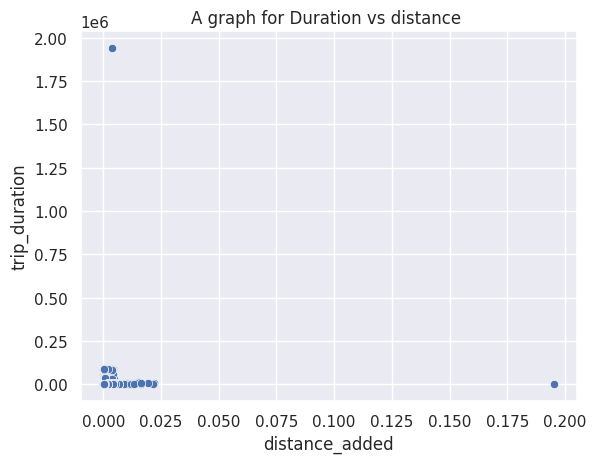

In [60]:
plt.title('A graph for Duration vs distance ')
sns.set_palette(palette='Set1', n_colors=2)
sns.scatterplot(x=distance_in_rads['distance_added'],y=taxi_trip['trip_duration'],data=taxi_trip,markers='o')


Text(0.5, 1.0, 'Box and Whisker plot for Trip duration ')

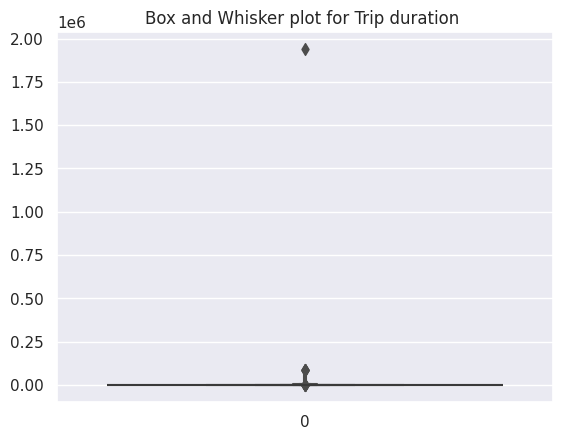

In [61]:
sns.boxenplot(taxi_trip['trip_duration'],color='blue')
plt.title('Box and Whisker plot for Trip duration ')

Text(0.5, 1.0, 'Distance travelled per Hour')

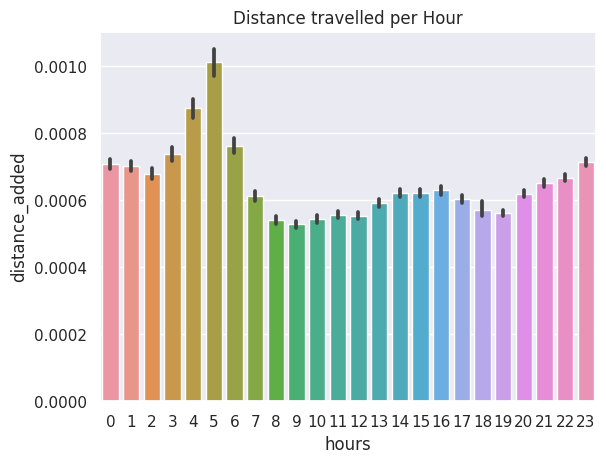

In [62]:


sns.barplot(x=taxi_trip['hours'],y=distance_in_rads['distance_added'])
sns.set_palette('cubehelix')
plt.title('Distance travelled per Hour')

In this case according to my hypothesis time duration is affected by the following :

1.   Day _

2.   Distance

3.   Time


**According to the graph the day that people travel in the most is on Sunday, which has proved the hypothesis to be true that most people travel on weekends hence it affects the trip duration.**


**The time that people travel the most is at fifth hour , which means if you travel at that time your trip duration will be affected .**


**We noticed from the scatterplot that distance has a linear relationship with the trip duration with a weak positive relationship**







In [ ]:
#from geopy.format import DISTANCE_FORMAT


n = len(distance_in_rads['distance_added'])
mean_x = sum(distance_in_rads['distance_added']) / n
mean_y = sum(taxi_trip['trip_duration']) / n
slope = sum((distance_in_rads['distance_added'][i] -distance_in_rads['distance_added'].mean() ) * (taxi_trip['trip_duration'][i] - taxi_trip['trip_duration'].mean()) for i in range(n)) / sum((distance_in_rads['distance_added'][i] - distance_in_rads['distance_added'].mean()) ** 2 for i in range(n))



In [ ]:
print("The gradient between duration and distance is", slope)

In conclusion when the distance is increased in kilometers ,we can expect the the time duration to increase by 116.38500061076375 in seconds .

Hence time duration is affected by the distance.